<a href="https://colab.research.google.com/github/Dakshdureja33/Car_price_prediction_ml/blob/main/Copy_of_Car_Price_Prediction_Using_Machine_Learning_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Car_Sales_Modified.csv')

### 1. Display Top 5 Rows of The Dataset

In [ ]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2009,15.30,35.85,43398,Diesel,Individual,Manual,0
1,2022,5.14,5.90,61865,Petrol,Dealer,Automatic,0
2,2017,1.51,2.64,103175,Petrol,Dealer,Automatic,0
3,2013,7.32,28.46,121201,Petrol,Dealer,Manual,1
4,2010,10.91,35.05,164480,Petrol,Individual,Manual,0


### 2. Check Last 5 Rows of The Dataset

In [ ]:
data.tail()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
9995,2015,10.39,28.82,59723,Petrol,Individual,Automatic,0
9996,2018,22.96,49.94,181660,Petrol,Individual,Manual,1
9997,2006,36.13,47.70,120050,Petrol,Individual,Manual,0
9998,2003,25.96,33.10,78707,CNG,Individual,Manual,0
9999,2022,21.58,23.76,14920,Diesel,Individual,Automatic,2


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
data.shape

(10000, 8)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 8


### 4. Get Information About Our Dataset Like the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           10000 non-null  int64  
 1   Selling_Price  10000 non-null  float64
 2   Present_Price  10000 non-null  float64
 3   Kms_Driven     10000 non-null  int64  
 4   Fuel_Type      10000 non-null  object 
 5   Seller_Type    10000 non-null  object 
 6   Transmission   10000 non-null  object 
 7   Owner          10000 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 625.1+ KB


### 5. Check Null Values In The Dataset

In [ ]:
data.isnull().sum()

,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
# Fill categorical columns with mode
cat_cols = ['Fuel_Type', 'Seller_Type']
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check again
print("Missing values after filling everything:")
print(data.isnull().sum())
data['Present_Price'].fillna(data['Present_Price'].mean(), inplace=True)

Missing values after filling everything:
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [ ]:
data.isnull().sum()

,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


### 6. Get Overall Statistics About The Dataset

In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2013.024000,15.035247,25.434851,100263.561600,0.593000
std,6.058737,9.919461,14.057793,57390.465951,0.842509
min,2003.000000,0.270000,1.010000,1009.000000,0.000000
25%,2008.000000,7.080000,13.427500,51102.250000,0.000000
50%,2013.000000,13.240000,25.380000,99874.500000,0.000000
75%,2018.000000,21.570000,37.382500,149883.250000,1.000000
max,2023.000000,46.640000,49.990000,199988.000000,3.000000


### 7. Data Preprocessing

In [ ]:
data.head(1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2009,15.3,35.85,43398,Diesel,Individual,Manual,0


In [ ]:
import datetime

In [ ]:
date_time = datetime.datetime.now()

In [ ]:
data['Age']=date_time.year - data['Year']

In [ ]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2009,15.30,35.85,43398,Diesel,Individual,Manual,0,16
1,2022,5.14,5.90,61865,Petrol,Dealer,Automatic,0,3
2,2017,1.51,2.64,103175,Petrol,Dealer,Automatic,0,8
3,2013,7.32,28.46,121201,Petrol,Dealer,Manual,1,12
4,2010,10.91,35.05,164480,Petrol,Individual,Manual,0,15


In [ ]:
data.drop('Year',axis=1,inplace=True)

In [ ]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,15.30,35.85,43398,Diesel,Individual,Manual,0,16
1,5.14,5.90,61865,Petrol,Dealer,Automatic,0,3
2,1.51,2.64,103175,Petrol,Dealer,Automatic,0,8
3,7.32,28.46,121201,Petrol,Dealer,Manual,1,12
4,10.91,35.05,164480,Petrol,Individual,Manual,0,15


#### Outlier Removal

In [ ]:
import seaborn as sns

<Axes: ylabel='Selling_Price'>

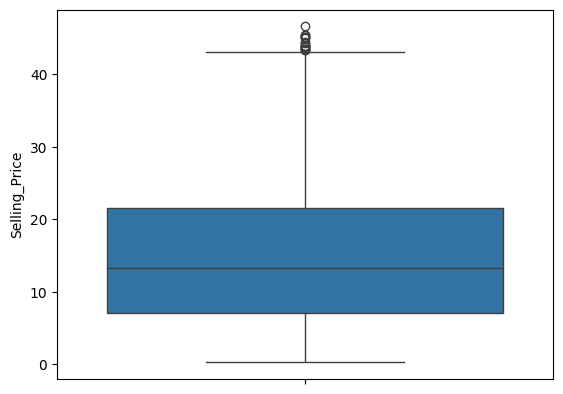

In [ ]:
sns.boxplot(data['Selling_Price'])

In [ ]:
sorted(data['Selling_Price'],reverse=True)

[46.64,
 45.45,
 45.41,
 45.23,
 45.17,
 45.07,
 44.52,
 44.29,
 43.96,
 43.9,
 43.89,
 43.86,
 43.83,
 43.56,
 43.54,
 43.48,
 43.37,
 43.36,
 43.12,
 43.05,
 43.01,
 42.76,
 42.65,
 42.62,
 42.46,
 42.38,
 42.35,
 42.3,
 42.11,
 42.1,
 42.06,
 42.02,
 41.94,
 41.94,
 41.83,
 41.76,
 41.49,
 41.45,
 41.43,
 41.42,
 41.4,
 41.34,
 41.32,
 41.29,
 41.28,
 41.25,
 41.25,
 41.18,
 41.18,
 41.17,
 41.13,
 41.11,
 41.1,
 41.06,
 41.04,
 40.92,
 40.86,
 40.86,
 40.81,
 40.75,
 40.68,
 40.64,
 40.59,
 40.53,
 40.51,
 40.46,
 40.41,
 40.38,
 40.36,
 40.34,
 40.34,
 40.26,
 40.23,
 40.19,
 40.18,
 40.16,
 40.15,
 40.12,
 40.09,
 40.08,
 40.01,
 39.98,
 39.93,
 39.93,
 39.9,
 39.89,
 39.89,
 39.83,
 39.8,
 39.78,
 39.74,
 39.72,
 39.7,
 39.66,
 39.62,
 39.6,
 39.58,
 39.57,
 39.55,
 39.47,
 39.47,
 39.46,
 39.44,
 39.44,
 39.43,
 39.42,
 39.35,
 39.32,
 39.31,
 39.26,
 39.26,
 39.22,
 39.19,
 39.18,
 39.15,
 39.15,
 39.14,
 39.05,
 39.01,
 38.98,
 38.97,
 38.96,
 38.93,
 38.91,
 38.89,
 38.88,
 

#### Encoding the Categorical Columns

In [ ]:
data.head(1)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,15.3,35.85,43398,Diesel,Individual,Manual,0,16


In [ ]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [ ]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [ ]:
data['Fuel_Type'].unique()

array([1, 0, 2])

In [ ]:
data['Seller_Type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
data['Seller_Type'] = data['Seller_Type'].map({'Dealer':0,'Individual':1})

In [ ]:
data['Seller_Type'].unique()

array([ 1.,  0., nan])

In [ ]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
data['Transmission'] =data['Transmission'].map({'Manual':0,'Automatic':1})

In [ ]:
data['Transmission'].unique()

array([0, 1])

In [ ]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,15.30,35.85,43398,1,1.0,0,0,16
1,5.14,5.90,61865,0,0.0,1,0,3
2,1.51,2.64,103175,0,0.0,1,0,8
3,7.32,28.46,121201,0,0.0,0,1,12
4,10.91,35.05,164480,0,1.0,0,0,15


Automatic have higher price as compare to manual

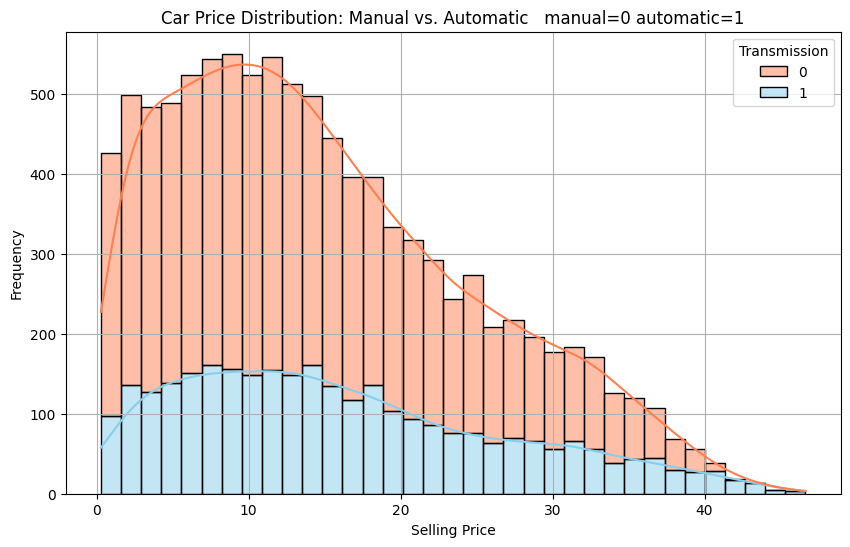

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing car data

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(data=data, x='Selling_Price', hue='Transmission',
             multiple="stack", kde=True, palette=['coral', 'skyblue'])
plt.title('Car Price Distribution: Manual vs. Automatic   manual=0 automatic=1')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

# Diesel cars generally have a broader price distribution compared to petrol **cars**

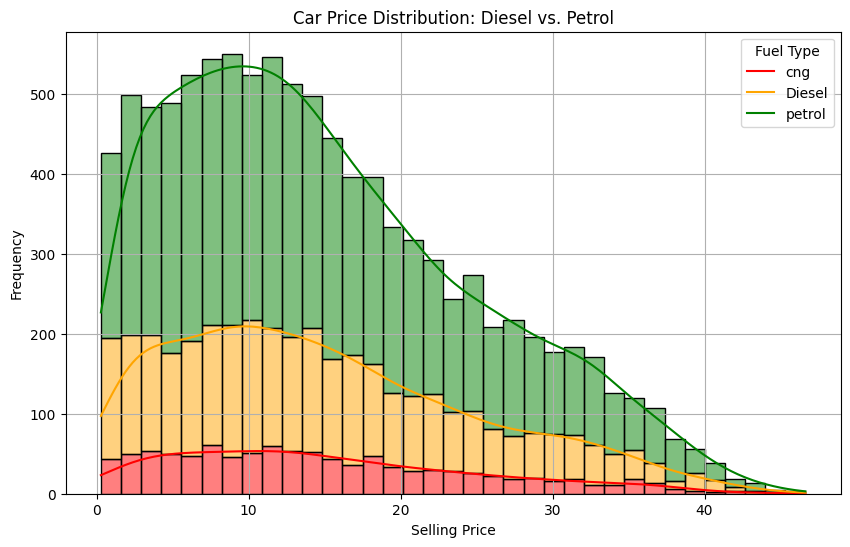

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing car data

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(data=data, x='Selling_Price', hue='Fuel_Type',
             multiple="stack", kde=True, palette=['green', 'orange','red'])
plt.title('Car Price Distribution: Diesel vs. Petrol')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(title='Fuel Type', labels=['cng', 'Diesel','petrol'])  # Customize legend
plt.show()

### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [ ]:
X = data.drop(['Selling_Price'],axis=1)
y = data['Selling_Price']

In [ ]:
y

,Selling_Price
0,15.30
1,5.14
2,1.51
3,7.32
4,10.91
...,...
9995,10.39
9996,22.96
9997,36.13
9998,25.96


### 9. Splitting The Dataset Into The Training Set And Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### 10. Import The models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### 11. Model Training

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

# Assuming X and y are defined earlier in your code

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create an imputer object with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Model Training
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)

# Prediction on Test Data
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

# Evaluating the Algorithm
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

print(score1, score2, score3, score4)

final_data = pd.DataFrame({'Models': ['LR', 'RF', 'GBR', 'XG'],
                           "R2_SCORE": [score1, score2, score3, score4]})

print(final_data)

0.8021864022695137 0.779608643691883 0.7969319087329998 0.7588794763479892
  Models  R2_SCORE
0     LR  0.802186
1     RF  0.779609
2    GBR  0.796932
3     XG  0.758879


### 12. Prediction on Test Data

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create an imputer object with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Model Training
lr = LinearRegression()  # Define and train the LinearRegression model (lr)
lr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)

# Prediction on Test Data
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

# Evaluating the Algorithm
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

print(score1, score2, score3, score4)

final_data = pd.DataFrame({'Models': ['LR', 'RF', 'GBR', 'XG'],
                           "R2_SCORE": [score1, score2, score3, score4]})

print(final_data)

0.7030940777606307 0.9663872573649149 0.9689607359125461 0.9646144472246624
  Models  R2_SCORE
0     LR  0.703094
1     RF  0.966387
2    GBR  0.968961
3     XG  0.964614


### 13. Evaluating the Algorithm

In [ ]:
from sklearn import metrics

In [ ]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [ ]:
print(score1,score2,score3,score4)

0.7030940777606307 0.9663872573649149 0.9689607359125461 0.9646144472246624


In [ ]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score1,score2,score3,score4]})

In [ ]:
# Model Training (GBR)
from sklearn.metrics import r2_score # Import r2_score
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred = gbr_model.predict(X_train)
y_test_pred = gbr_model.predict(X_test)

# Calculate R-squared scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the results
print(f"GBR R-squared Score (Training): {r2_train:.4f}")
print(f"GBR R-squared Score (Testing): {r2_test:.4f}")

GBR R-squared Score (Training): 0.9721
GBR R-squared Score (Testing): 0.9690


In [ ]:
final_data

,Models,R2_SCORE
0,LR,0.703094
1,RF,0.966387
2,GBR,0.968961
3,XG,0.964614


In [ ]:
imputer = SimpleImputer(strategy="mean")


X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Import necessary metrics functions
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model Training and Evaluation
models = {
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(),
    "GBR": GradientBoostingRegressor(),
    "XG": XGBRegressor(),
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_test_pred)

    mse = mean_squared_error(y_test, y_test_pred)
    rmse = mse**0.5  # Calculate RMSE manually
    mae = mean_absolute_error(y_test, y_test_pred)

    results.append([model_name, r2, rmse, mae])

# Create DataFrame for results
results_df = pd.DataFrame(
    results, columns=["Model", "R-squared", "RMSE", "MAE"]
)

print(results_df)

  Model  R-squared      RMSE       MAE
0    LR   0.703094  5.400504  4.218369
1    RF   0.966151  1.823477  1.344040
2   GBR   0.968961  1.746149  1.328156
3    XG   0.964614  1.864395  1.376954


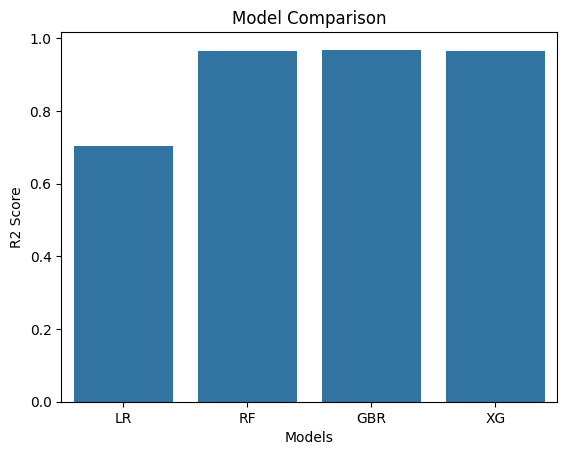

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x='Models', y='R2_SCORE', data=final_data)

# Add title and labels (optional)
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Score')

# Display the plot
plt.show()

In [ ]:
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Import necessary metrics functions
from sklearn.metrics import r2_score

# Model Training and Evaluation
models = {
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(),
    "GBR": GradientBoostingRegressor(),
    "XG": XGBRegressor(),
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions for training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R-squared for training and testing sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results.append([model_name, r2_train, r2_test])

# Create DataFrame for results
results_df = pd.DataFrame(
    results,
    columns=["Model", "R-squared (Train)", "R-squared (Test)"]
)

print(results_df)

  Model  R-squared (Train)  R-squared (Test)
0    LR           0.713865          0.703094
1    RF           0.995167          0.966337
2   GBR           0.972071          0.968960
3    XG           0.989273          0.964614


### 14. Save The Model

In [ ]:
import joblib
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor


# Create an imputer object with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data (X) and transform it
X_imputed = imputer.fit_transform(X)

# Instead of XGBRegressor, use GradientBoostingRegressor:
gbr = GradientBoostingRegressor()
gbr_final = gbr.fit(X_imputed, y)  # Use the imputed data here

# Later, when you want to save the model, use gbr_final:
joblib.dump(gbr_final, 'car_price_predictor')

['car_price_predictor']

In [ ]:
import joblib

In [ ]:
joblib.dump(gbr_final,'car_price_predictor')

['car_price_predictor']

In [ ]:
model = joblib.load('car_price_predictor')

### 15. Prediction on New Data

In [ ]:
import pandas as pd
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven':27000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

In [ ]:
model.predict(data_new)

array([2.87509892])

### GUI

In [ ]:
import joblib
import pandas as pd

def predict_car_price():
    """Predicts the price of a car based on user inputs."""

    print("Enter the car details:")
    present_price = float(input("Present Price: "))
    kms_driven = float(input("Kms Driven: "))
    fuel_type = int(input("Fuel Type (0: Petrol, 1: Diesel, 2: CNG): "))
    seller_type = int(input("Seller Type (0: Dealer, 1: Individual): "))
    transmission = int(input("Transmission (0: Manual, 1: Automatic): "))
    owner = int(input("Owner (0: First Owner, 1: Second Owner, etc.): "))
    age = int(input("Age of the car in years: "))

    data_new = pd.DataFrame({
        'Present_Price': [present_price],
        'Kms_Driven': [kms_driven],
        'Fuel_Type': [fuel_type],
        'Seller_Type': [seller_type],
        'Transmission': [transmission],
        'Owner': [owner],
        'Age': [age]
    })

    model = joblib.load('car_price_predictor')
    result = model.predict(data_new)

    print("Predicted Car Purchase Amount:", result[0])

if __name__ == "__main__":
    predict_car_price()

Enter the car details:
Present Price: 5.00
Kms Driven: 100000
Fuel Type (0: Petrol, 1: Diesel, 2: CNG): 0
Seller Type (0: Dealer, 1: Individual): 1
Transmission (0: Manual, 1: Automatic): 0
Owner (0: First Owner, 1: Second Owner, etc.): 1
Age of the car in years: 15
Predicted Car Purchase Amount: 1.3736514085236065
